# EDA-Project 2

Это ваш второй проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"houses_to_rent.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.

# Questions
**1. Info about my dataset**
   * Read data
   * Info
   
**2. Data pre-processing**
   * Missing Values
   * Incorrect Format
   * Incorrect Headers
   * Outliers
   
**3. Reletionship columns**

**4. Univariate analysis | Bivariate analysis | Multivariate analysis** 

**5. Choose house(by Area & room & total)**




# Import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#I read csv file using pandas
houses=pd.read_csv('houses_to_rent.csv')

#To display the top 5 rows
houses.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [3]:
#In data has column that name is Unnamed: 0 as index. We don't need it that is why I droped
houses.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#To display the bottom 5 rows. And we can see There is not column that I droped 
houses.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


**I should check for the datatypes because sometimes numeric columns would be stored as string or object,
if in that case, we have to convert that str to numeric data only then we can plot the data via a graph**

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


**Hoa, Rent amount, property tax, fire insurance, total columns' dtype os O, but their dtype should be numeric.
My next task is date pre-processing and change dtypes.**

In [6]:
#I used the following to clean the data
houses.drop(np.where(houses.hoa=='Sem info')[0].tolist(), inplace=True)

#Reindexing
houses.index=np.arange(len(houses)).tolist()

In [7]:
houses.drop(np.where(houses.hoa=='Incluso')[0].tolist(), inplace=True)

#Reindexing
houses.index=np.arange(len(houses)).tolist()

In [8]:
houses.drop(np.where(houses['property tax']=='Incluso')[0].tolist(), inplace=True)

#Reindexing
houses.index=np.arange(len(houses)).tolist()

In [9]:
types=['hoa','rent amount','property tax','fire insurance','total']
rubbish=['R$', ',']
for i in types:
    for j in rubbish:
        houses[i]=houses[i].apply(lambda x: x.replace(j, ""))
    houses[i]=pd.to_numeric(houses[i])
    print(f'Column {i} has cleaned')

Column hoa has cleaned
Column rent amount has cleaned
Column property tax has cleaned
Column fire insurance has cleaned
Column total has cleaned


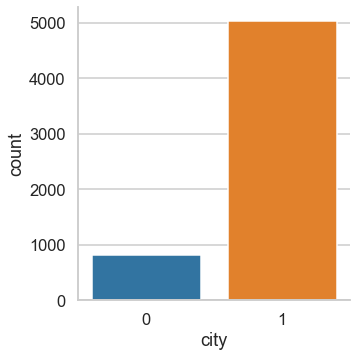

In [10]:
# Count city and floor columns
sns.set_style('whitegrid')
sns.set_context('talk')
g=sns.catplot(x='city', data=houses, kind='count', height=5)

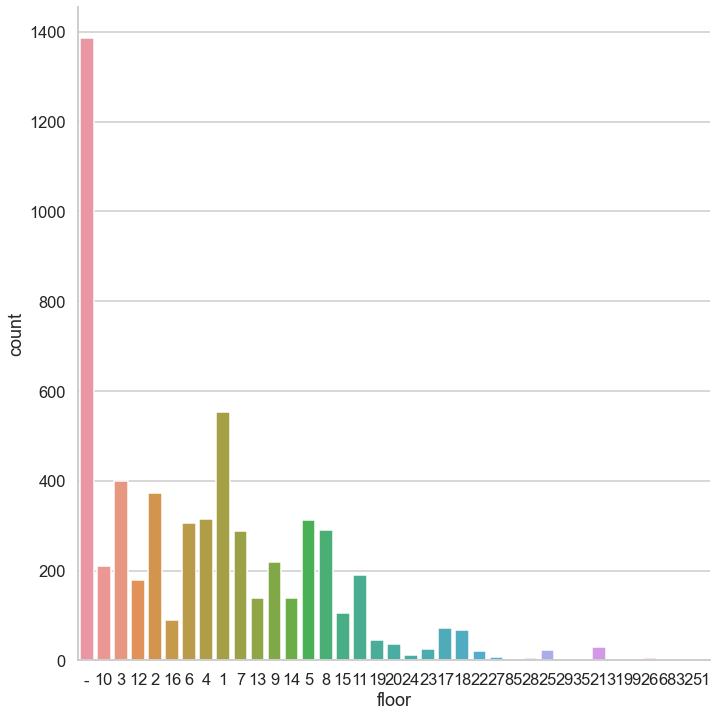

In [11]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.catplot(x='floor', data=houses, kind='count', height=10);

In [12]:
#I think Not important floor and city when choose houses
houses.drop(['city', 'floor'], axis=1, inplace=True)

In [13]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852 entries, 0 to 5851
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   area            5852 non-null   int64 
 1   rooms           5852 non-null   int64 
 2   bathroom        5852 non-null   int64 
 3   parking spaces  5852 non-null   int64 
 4   animal          5852 non-null   object
 5   furniture       5852 non-null   object
 6   hoa             5852 non-null   int64 
 7   rent amount     5852 non-null   int64 
 8   property tax    5852 non-null   int64 
 9   fire insurance  5852 non-null   int64 
 10  total           5852 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 708.6+ KB


## Outliers
Please implement the function ```plot_box_grid (data, figsize = (20,20))```, which will display the ```boxplot``` for each column in the pandas.DataFrame input argument. The grid should be square, for example ```2x2```, ```3x3```, ```4x4```, etc., depending on the number of columns. Please make a generic function that can handle different number of columns in ```pandas.DataFrame```.

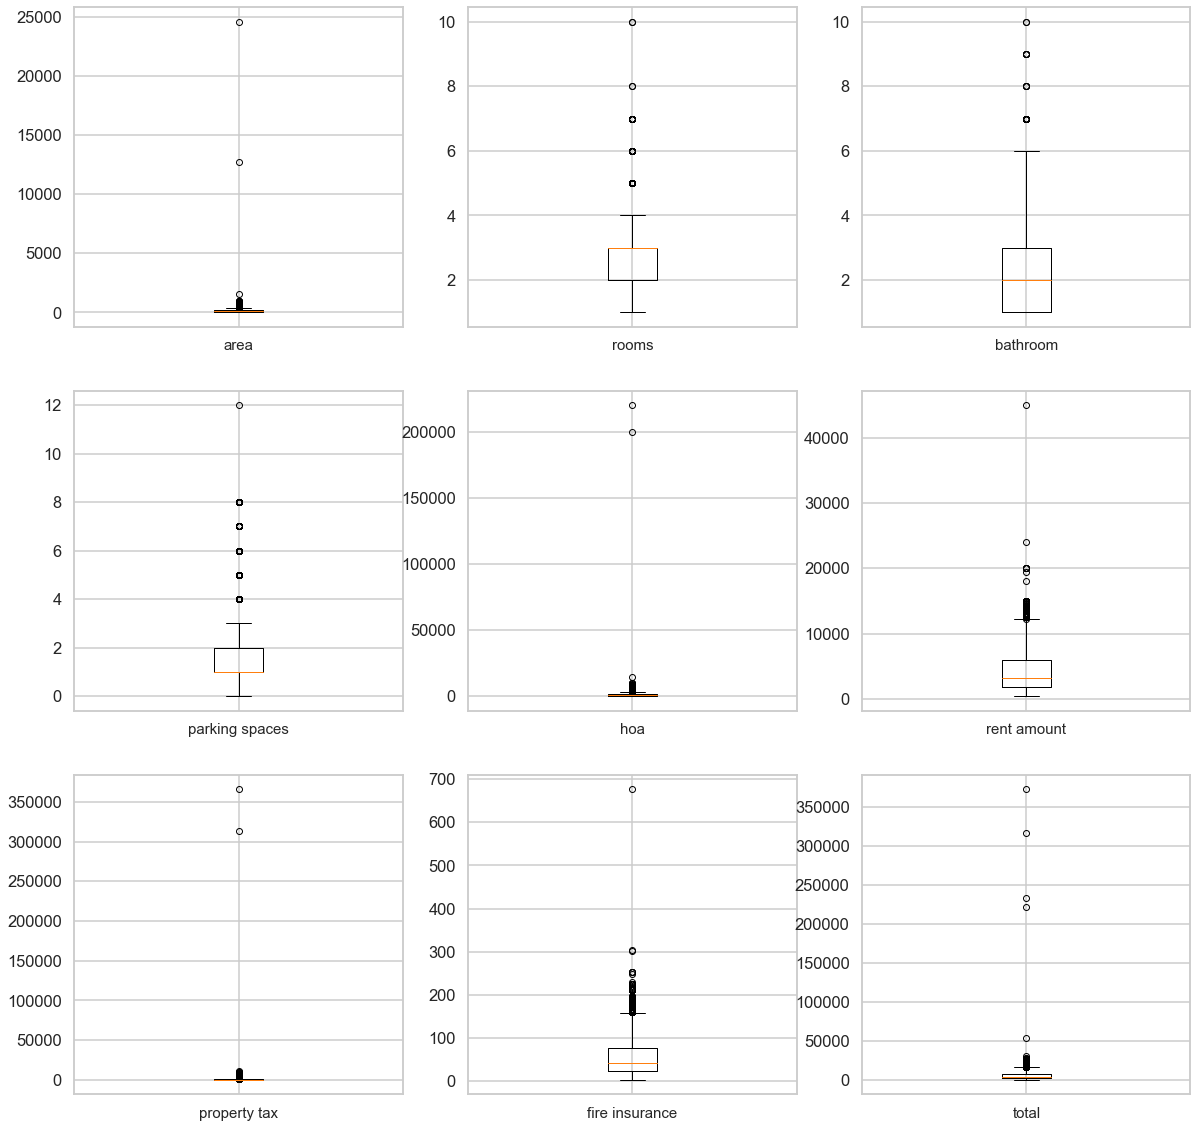

In [14]:
#Detecting Outliers
def plot_box_grid(data,figsize=(20,20)):

    plt.rcParams["figure.figsize"]=figsize
    fig=plt.figure()
    axs=[]
    r=int(len(data.columns)**0.5)
    if r**2!=len(data.columns):
        r+=1
    for i in range(len(data.columns)):
        axs.append(fig.add_subplot(r, r, i+1))
        axs[i].boxplot(data[data.columns[i]])
        axs[i].set_xticklabels([data.columns[i]], fontsize=15)

#Before dropping outliers
plot_box_grid(houses.select_dtypes(include='number'))

In [15]:
houses.describe()
#Here we can see so much outliers. std and difference between mean & median is large 

,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000
mean,150.911825,2.493677,2.345523,1.751709,1127.167293,4402.008544,500.181989,58.127136,6087.677375
std,381.768459,1.120555,1.435645,1.583447,4052.655906,3574.415982,6331.712544,49.142511,8882.647188
min,10.000000,1.000000,1.000000,0.000000,0.000000,420.000000,0.000000,3.000000,736.000000
25%,58.000000,2.000000,1.000000,1.000000,242.250000,1800.000000,35.000000,23.000000,2481.750000
50%,100.000000,3.000000,2.000000,1.000000,684.500000,3147.500000,150.000000,41.000000,4164.000000
75%,200.000000,3.000000,3.000000,2.000000,1500.000000,5992.500000,459.000000,77.000000,8116.750000
max,24606.000000,10.000000,10.000000,12.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [16]:
Q1=houses.quantile(0.25)
Q3=houses.quantile(0.75)
IQR=Q3-Q1
print(IQR)

area               142.00
rooms                1.00
bathroom             2.00
parking spaces       1.00
hoa               1257.75
rent amount       4192.50
property tax       424.00
fire insurance      54.00
total             5635.00
dtype: float64


In [17]:
houses = houses[~((houses < (Q1 - 1.5 * IQR)) | (houses > (Q3 + 1.5 * IQR))).any(axis=1)]
houses.shape

(4652, 11)

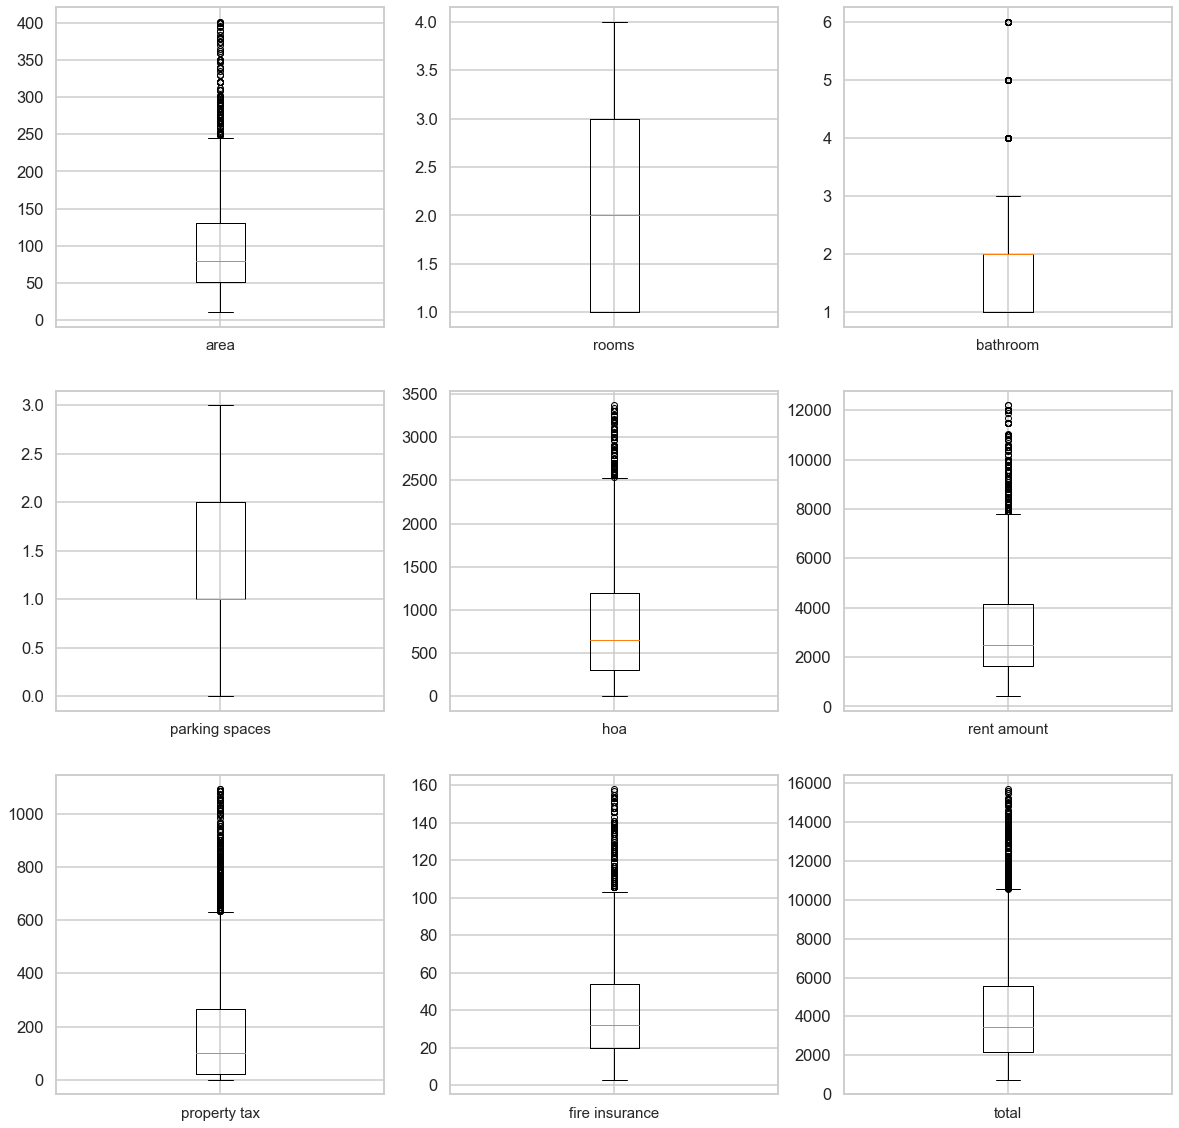

In [18]:
#after dropping outliers
plot_box_grid(houses.select_dtypes(include='number'))

In [19]:
#after dropping outliers
houses.describe()

,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total
count,4652.000000,4652.000000,4652.00000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000
mean,99.526870,2.182072,1.88736,1.189596,824.585555,3269.838779,185.234308,42.121668,4321.933577
std,67.132875,0.924218,1.03984,0.911804,725.381599,2293.524538,221.801133,30.521875,2927.624342
min,10.000000,1.000000,1.00000,0.000000,0.000000,420.000000,0.000000,3.000000,736.000000
25%,51.000000,1.000000,1.00000,1.000000,306.250000,1649.750000,21.000000,20.000000,2186.000000
50%,79.000000,2.000000,2.00000,1.000000,650.000000,2500.000000,100.000000,32.000000,3471.000000
75%,130.000000,3.000000,2.00000,2.000000,1200.000000,4143.250000,265.250000,54.000000,5539.750000
max,402.000000,4.000000,6.00000,3.000000,3370.000000,12200.000000,1092.000000,158.000000,15700.000000


In [20]:
# I sorted dataset by area
houses=houses.sort_values(by='area', ascending=True)
houses.index=np.arange(len(houses)).tolist()
houses.head()

,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,10,4,3,2,acept,not furnished,0,2670,21,41,2732
1,11,1,1,0,not acept,furnished,0,1181,0,15,1196
2,11,1,1,0,not acept,furnished,300,2100,42,27,2469
3,12,1,1,0,not acept,not furnished,0,1050,50,14,1114
4,13,1,1,0,acept,not furnished,0,2200,42,28,2270


## Relationship columns 

<Figure size 1440x1440 with 0 Axes>

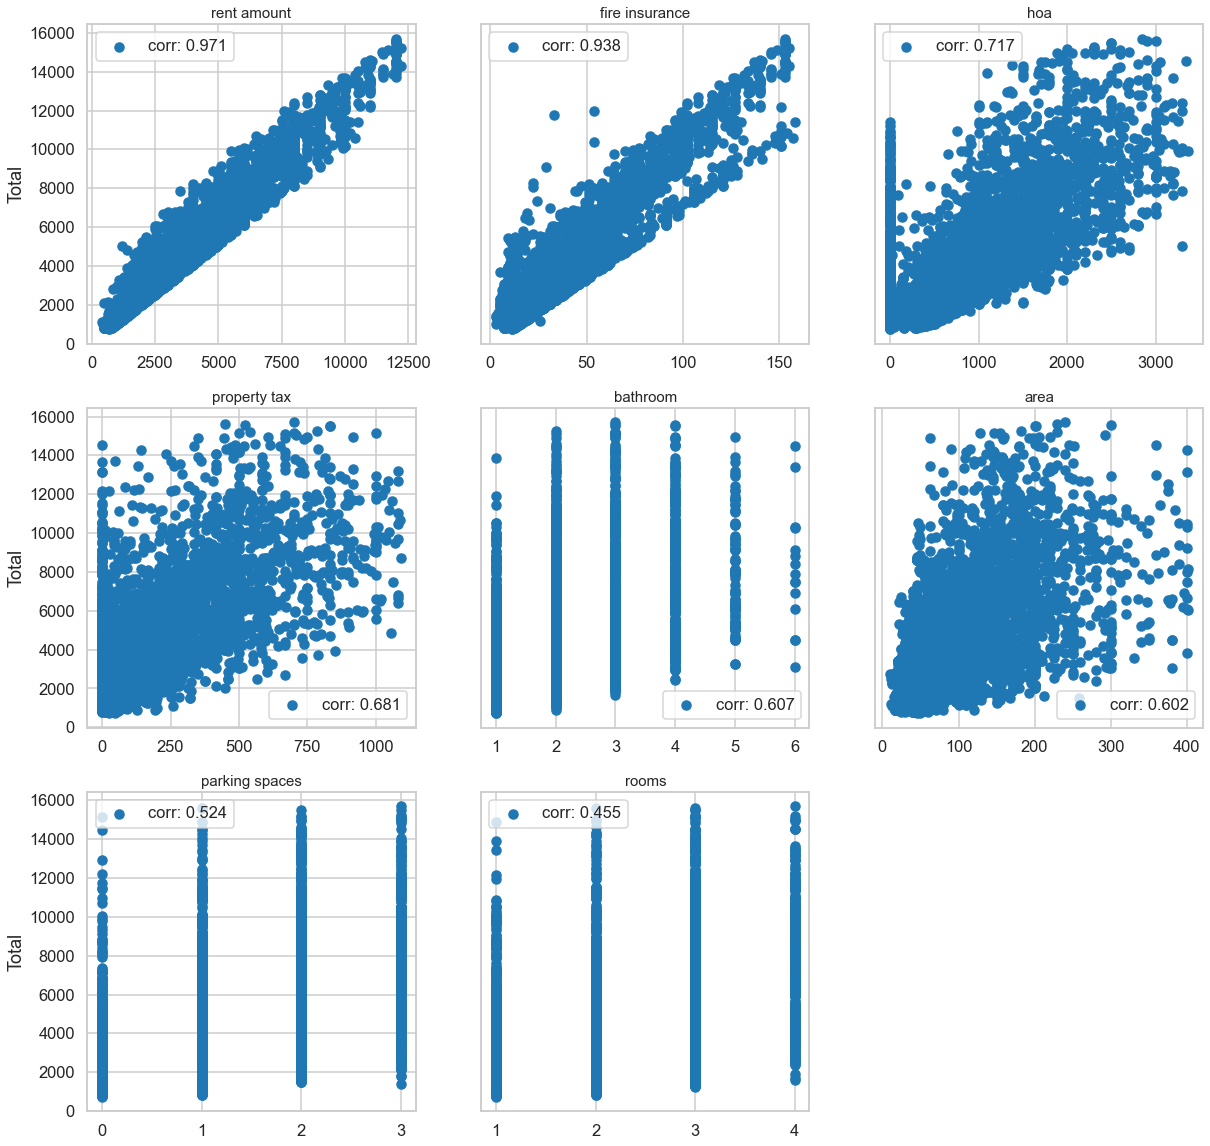

In [21]:
def plot_prices_grid(data,top=10,figsize=(20,20)):
    cor=data.corr()["total"].sort_values(ascending=False);
    sorted_coef=cor[1:];
    
    plt.rcParams["figure.figsize"]=figsize;
    plt.subplots_adjust(hspace=0.3,wspace=0.1);
    
    fig=plt.figure();
    axs=[]
    
    if top>len(sorted_coef):
        top=len(sorted_coef)
        
    r=int(top**0.5)
    if r**2!=top:
        r+=1
        
    ch=np.arange(0, top, r)
    
    for i in range(top):
        axs.append(fig.add_subplot(r, r, i+1))
        axs[i].scatter(data[sorted_coef.index[i]], data["total"], label=f"corr: {sorted_coef[i]:.3f}")
        axs[i].set_title(sorted_coef.index[i], fontsize=15)
        axs[i].legend();
        if not i in ch:
            axs[i].set_yticks([])
        else:
            axs[i].set_ylabel('Total')

plot_prices_grid(houses,top=len(houses.columns));

In [22]:
# On above result We can see top 4 columns by corr are very similar with Total column

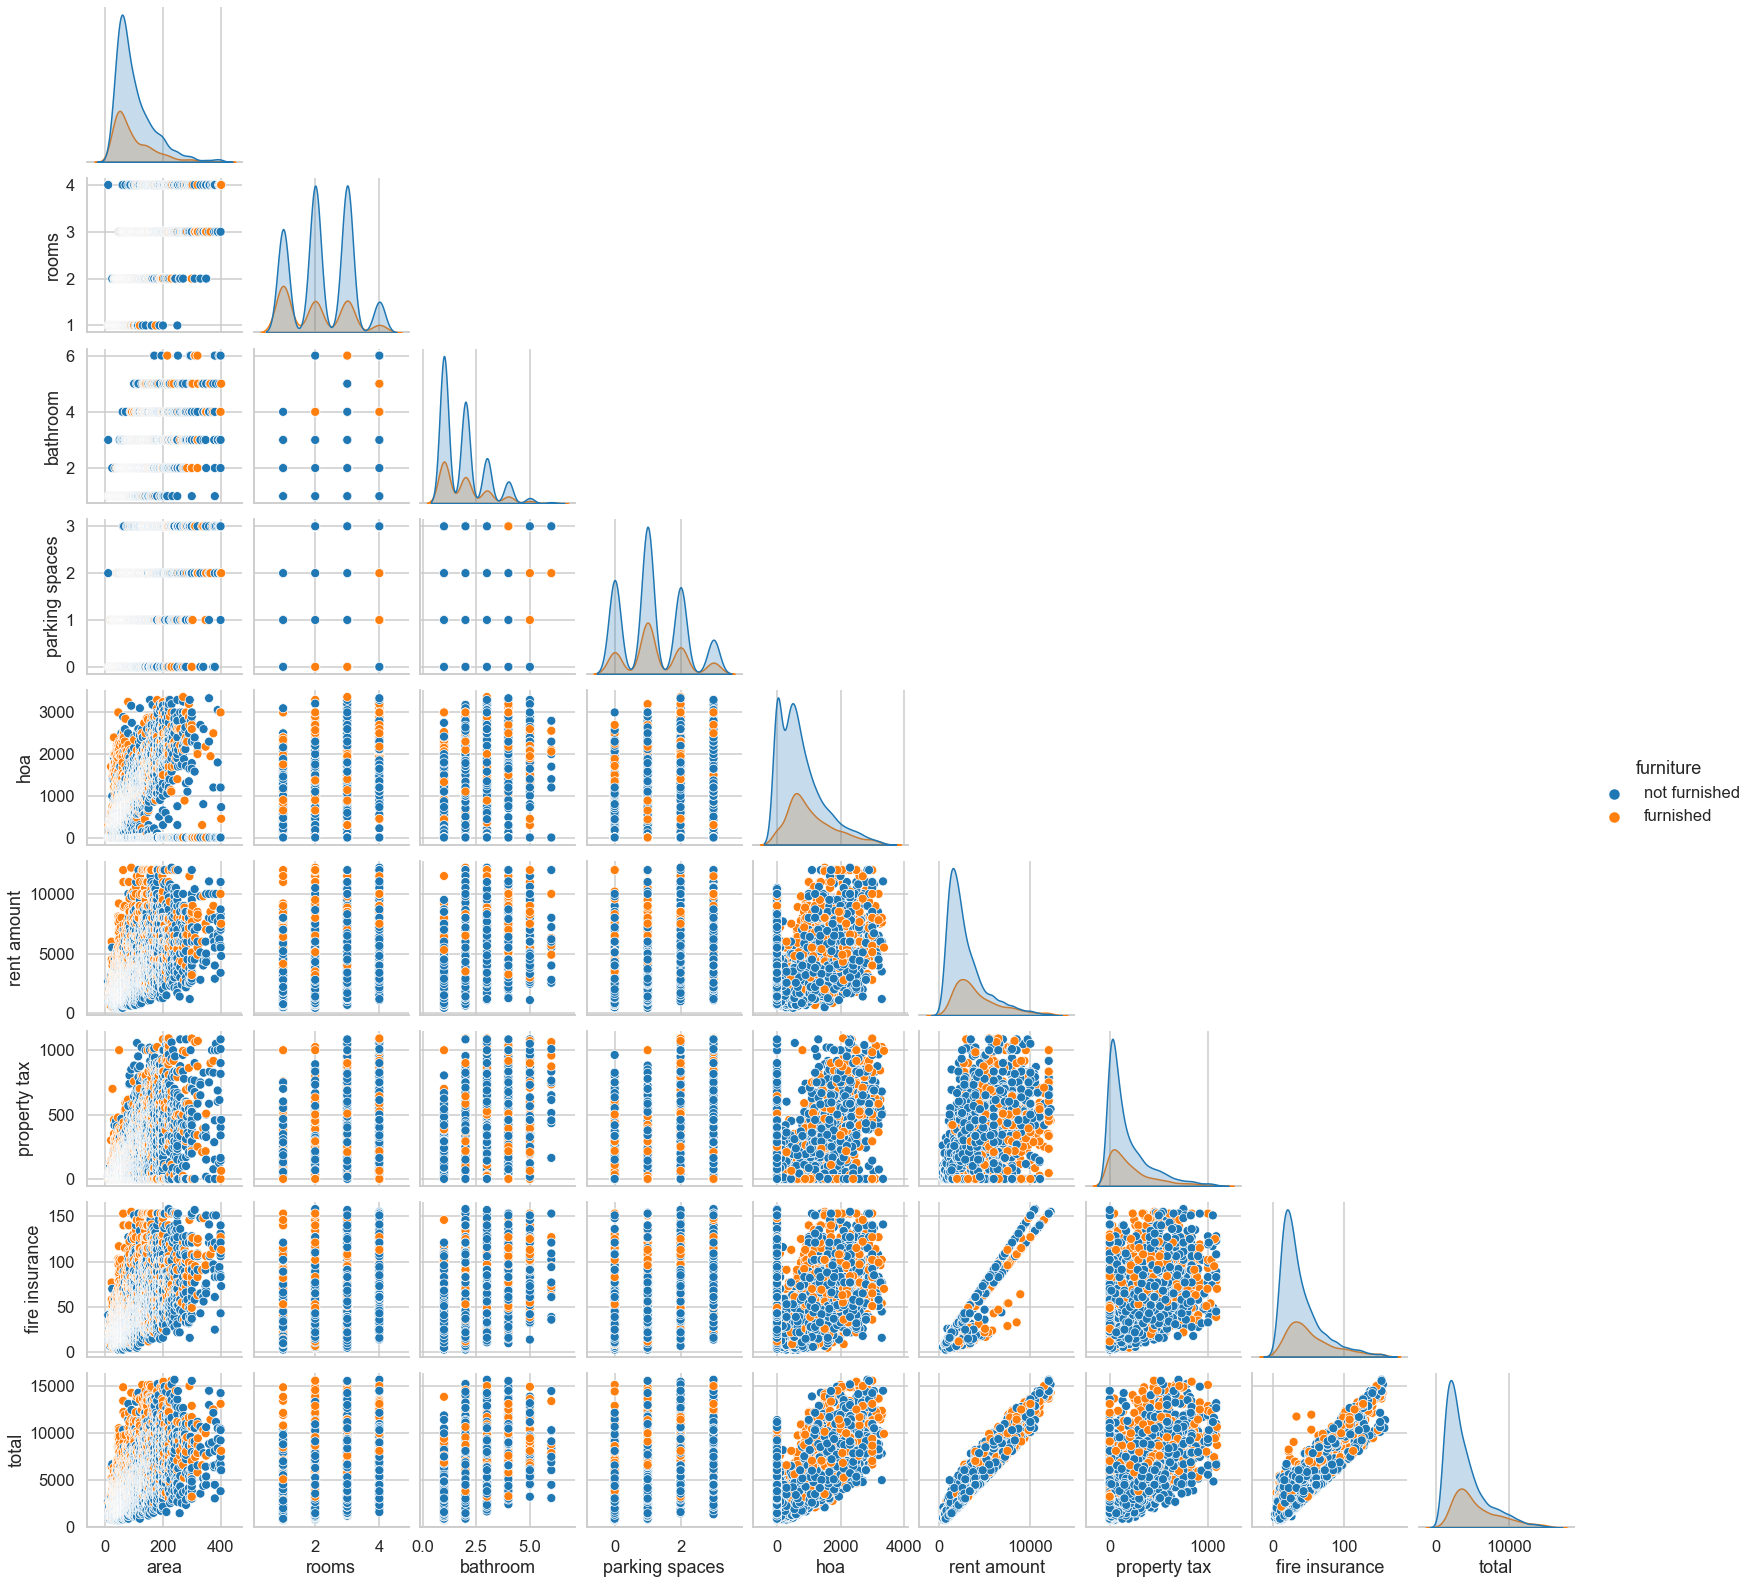

In [23]:
sns.pairplot(houses, diag_kind='kde',corner=True, hue='furniture')

## Area

I want to create a new column with area categories with 30 m^2 step such as: ```60-89.9, 90-119.9, 120-149.9``` and so on until I will cover the house with the longest area.

In [24]:
houses['30 mkv']=houses['area'].apply(lambda x: f'{int(x/30)*30}-{int(x/30)*30+29.9}')
houses.head()

,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total,30 mkv
0,10,4,3,2,acept,not furnished,0,2670,21,41,2732,0-29.9
1,11,1,1,0,not acept,furnished,0,1181,0,15,1196,0-29.9
2,11,1,1,0,not acept,furnished,300,2100,42,27,2469,0-29.9
3,12,1,1,0,not acept,not furnished,0,1050,50,14,1114,0-29.9
4,13,1,1,0,acept,not furnished,0,2200,42,28,2270,0-29.9


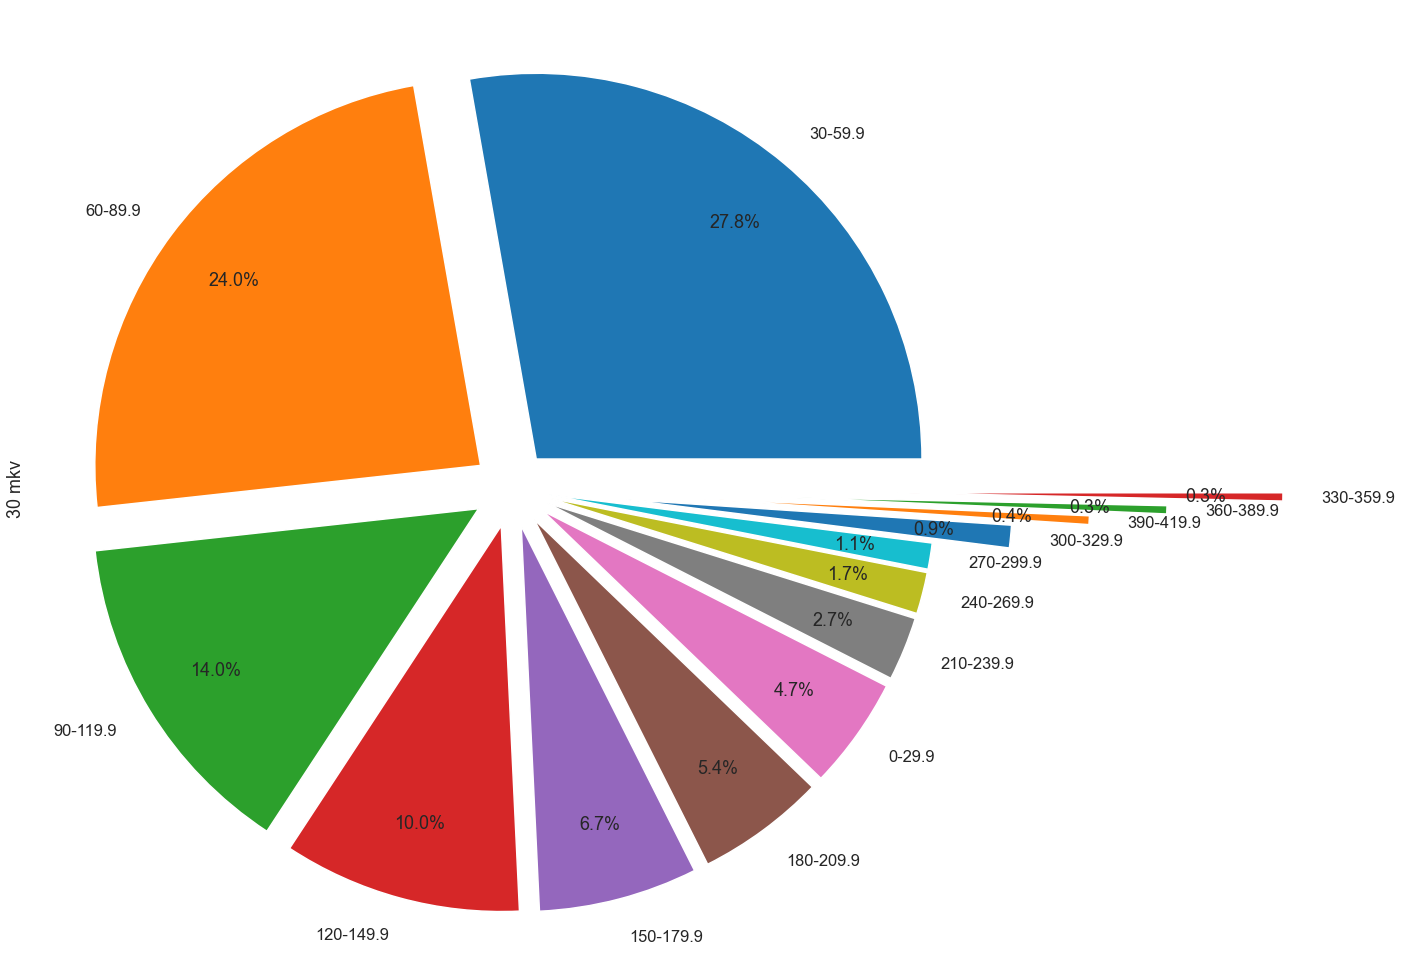

In [25]:
houses['30 mkv'].value_counts(normalize=True).plot.pie(autopct=lambda x: f"{x:.1f}%", 
                                                       explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1, 0.3, 0.5, 0.7, 1],
                                                      pctdistance=0.8)
plt.tight_layout()

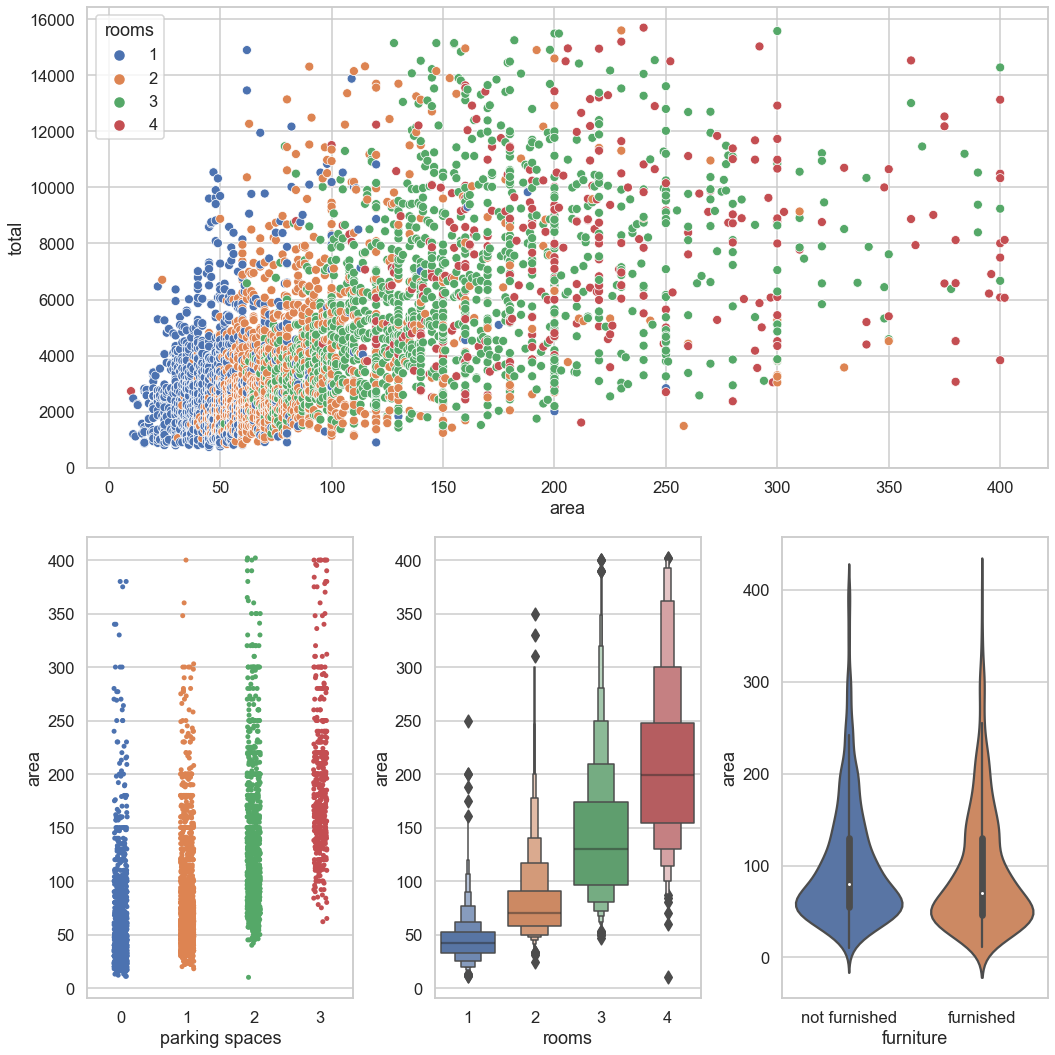

In [26]:
sns.set(style="whitegrid")
sns.set_context("talk")
fig=plt.figure(figsize=(15,15))
axs=[]

axs.append(fig.add_subplot(2,1,1))
sns.scatterplot(x='area', y='total', hue='rooms', palette="deep", data=houses)

axs.append(fig.add_subplot(2,3,4))
sns.stripplot(x="parking spaces", y="area", data=houses)

axs.append(fig.add_subplot(2,3,5))
sns.boxenplot(x="rooms", y="area", data=houses)

axs.append(fig.add_subplot(2,3,6))
sns.violinplot(x="furniture", y="area", data=houses)

plt.tight_layout()



## Rooms

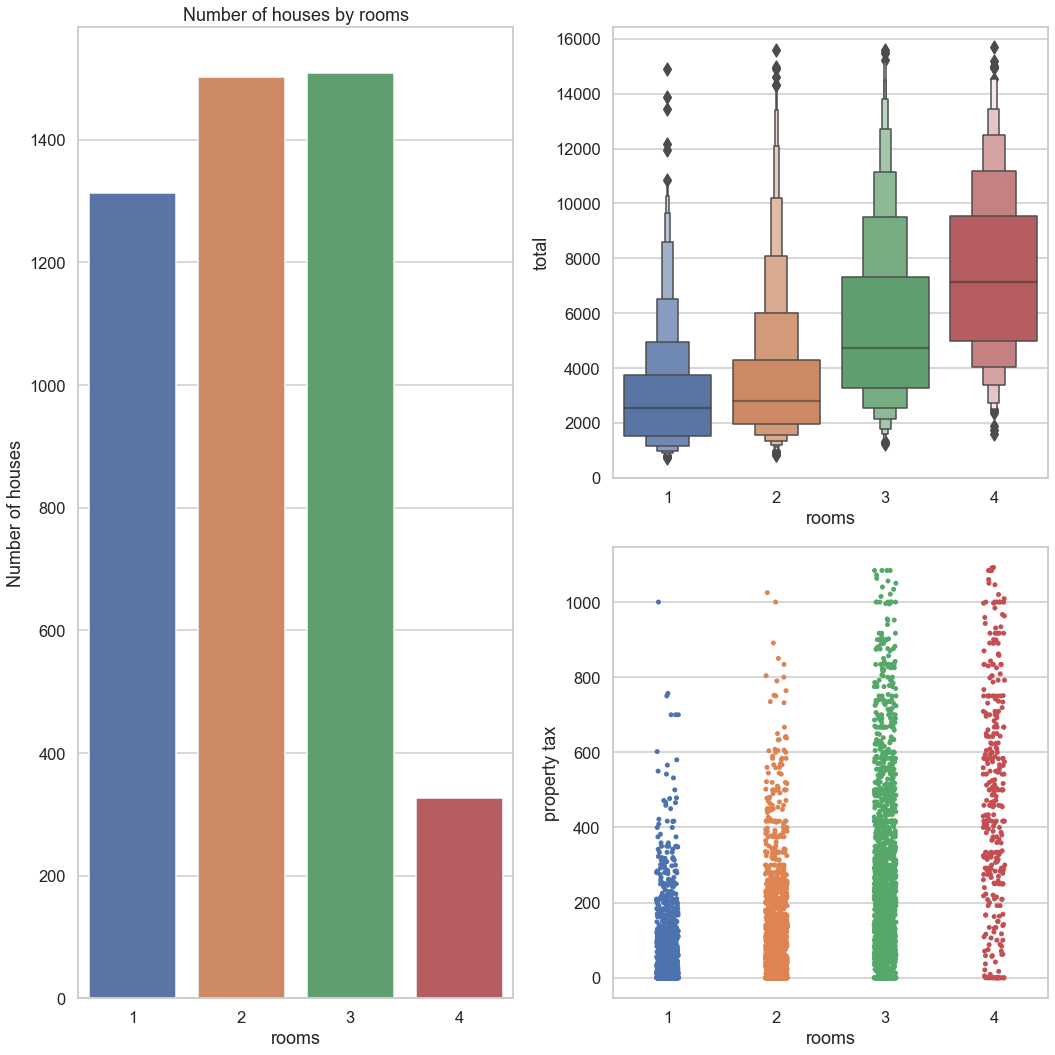

In [27]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig=plt.figure(figsize=(15,15))
axs=[]

axs.append(fig.add_subplot(1,2,1))
sns.countplot(x='rooms', data=houses)
plt.title('Number of houses by rooms')
plt.ylabel('Number of houses')
plt.xlabel('rooms');

axs.append(fig.add_subplot(2,2,2))
sns.boxenplot(x='rooms', y='total', data=houses)

axs.append(fig.add_subplot(2,2,4))
sns.stripplot(x='rooms', y='property tax', data=houses)



plt.tight_layout()

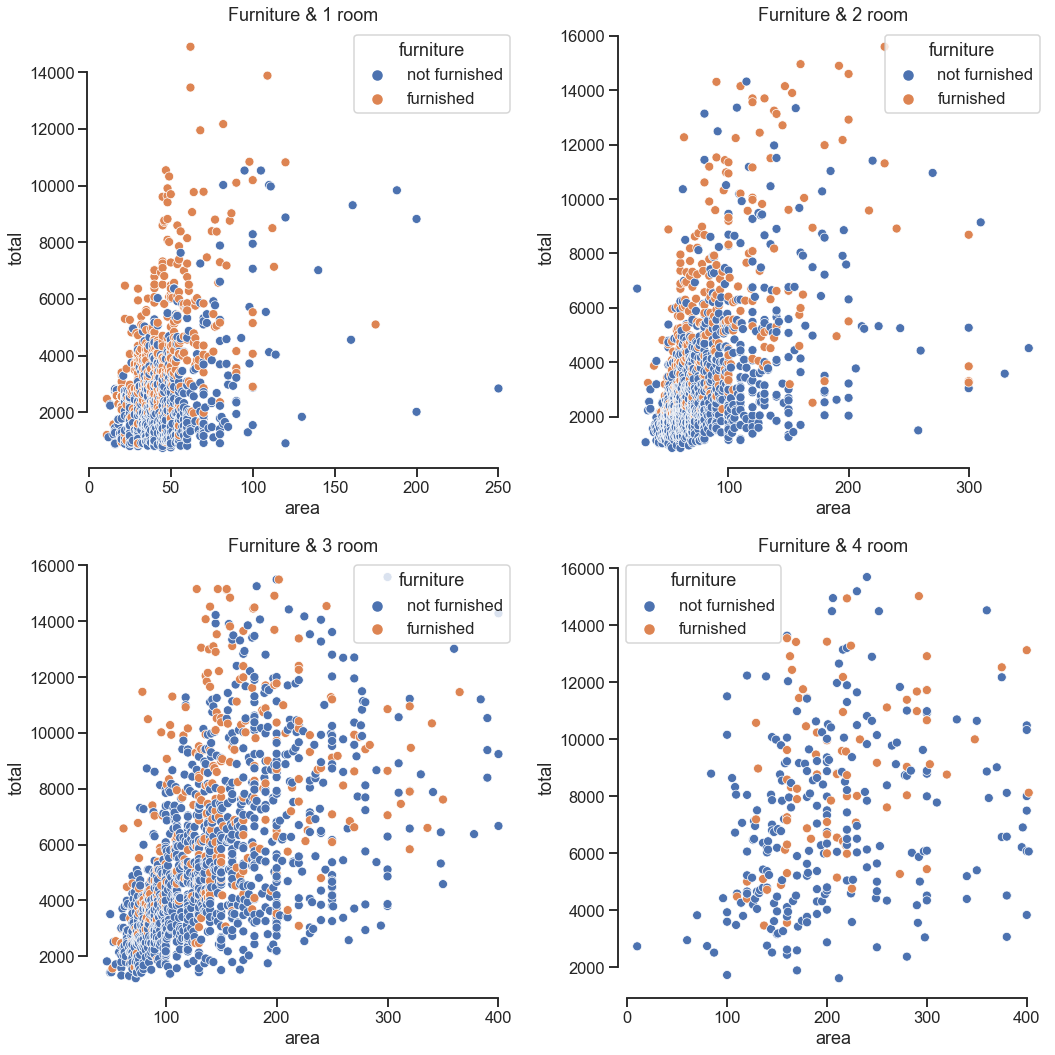

In [28]:
sns.set(style='ticks')
sns.set_context("talk")
fig=plt.figure(figsize=(15,15))
axs=[]

axs.append(fig.add_subplot(2,2,1))
sns.scatterplot(x='area', y='total', hue='furniture', hue_order=['not furnished', 'furnished'], data=houses[houses.rooms==1]).set(title='Furniture & 1 room')
sns.despine(trim=True)

axs.append(fig.add_subplot(2,2,2))
sns.scatterplot(x='area', y='total', hue='furniture', hue_order=['not furnished', 'furnished'], data=houses[houses.rooms==2]).set(title='Furniture & 2 room')
sns.despine(trim=True)

axs.append(fig.add_subplot(2,2,3))
sns.scatterplot(x='area', y='total', hue='furniture', hue_order=['not furnished', 'furnished'], data=houses[houses.rooms==3]).set(title='Furniture & 3 room')
sns.despine(trim=True)

axs.append(fig.add_subplot(2,2,4))
sns.scatterplot(x='area', y='total', hue='furniture', hue_order=['not furnished', 'furnished'], data=houses[houses.rooms==4]).set(title='Furniture & 4 room')
sns.despine(trim=True)
plt.tight_layout()

## Bathroom

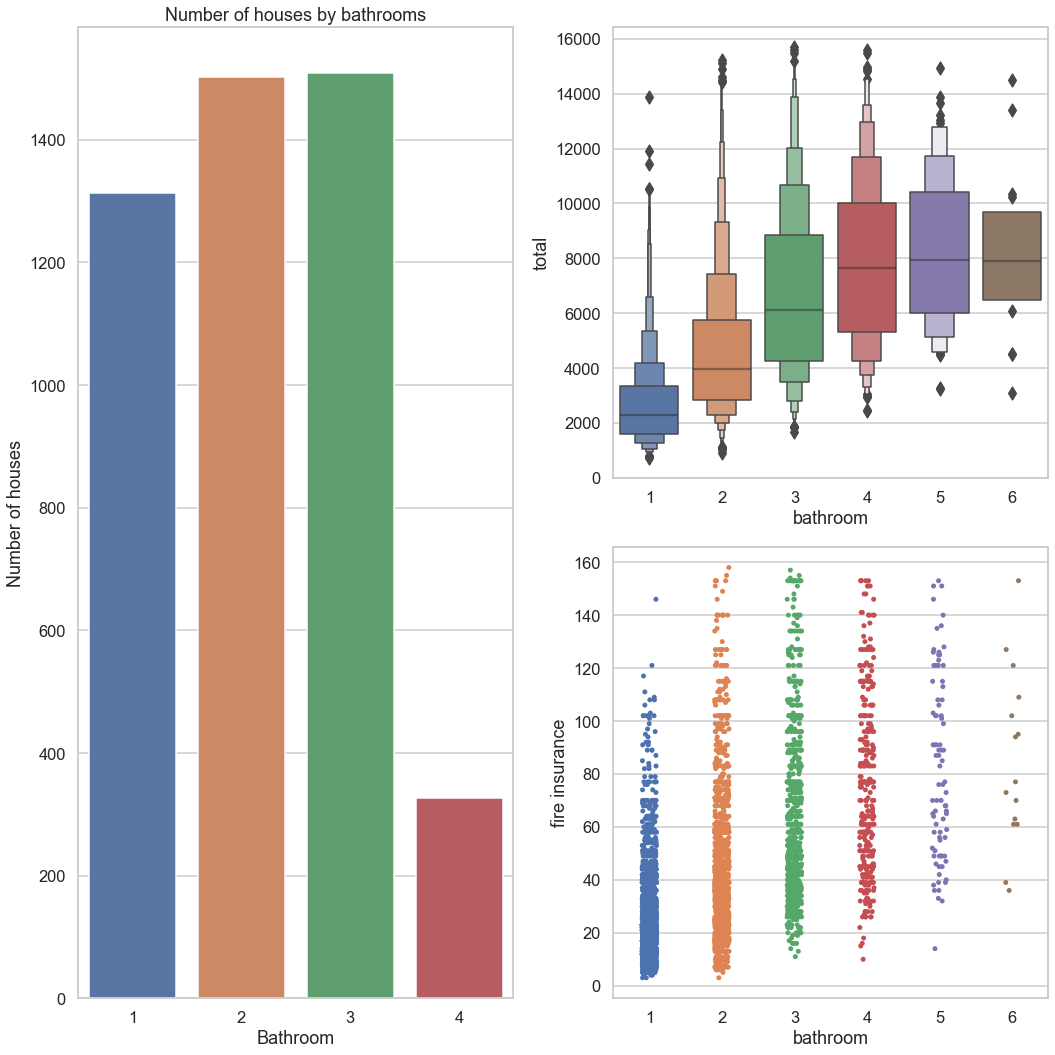

In [29]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig=plt.figure(figsize=(15,15))
axs=[]

axs.append(fig.add_subplot(1,2,1))
sns.countplot(x='rooms', data=houses)
plt.title('Number of houses by bathrooms')
plt.ylabel('Number of houses')
plt.xlabel('Bathroom');

axs.append(fig.add_subplot(2,2,2))
sns.boxenplot(x='bathroom', y='total', data=houses)

axs.append(fig.add_subplot(2,2,4))
sns.stripplot(x='bathroom', y='fire insurance', data=houses)



plt.tight_layout()

## Parking spaces

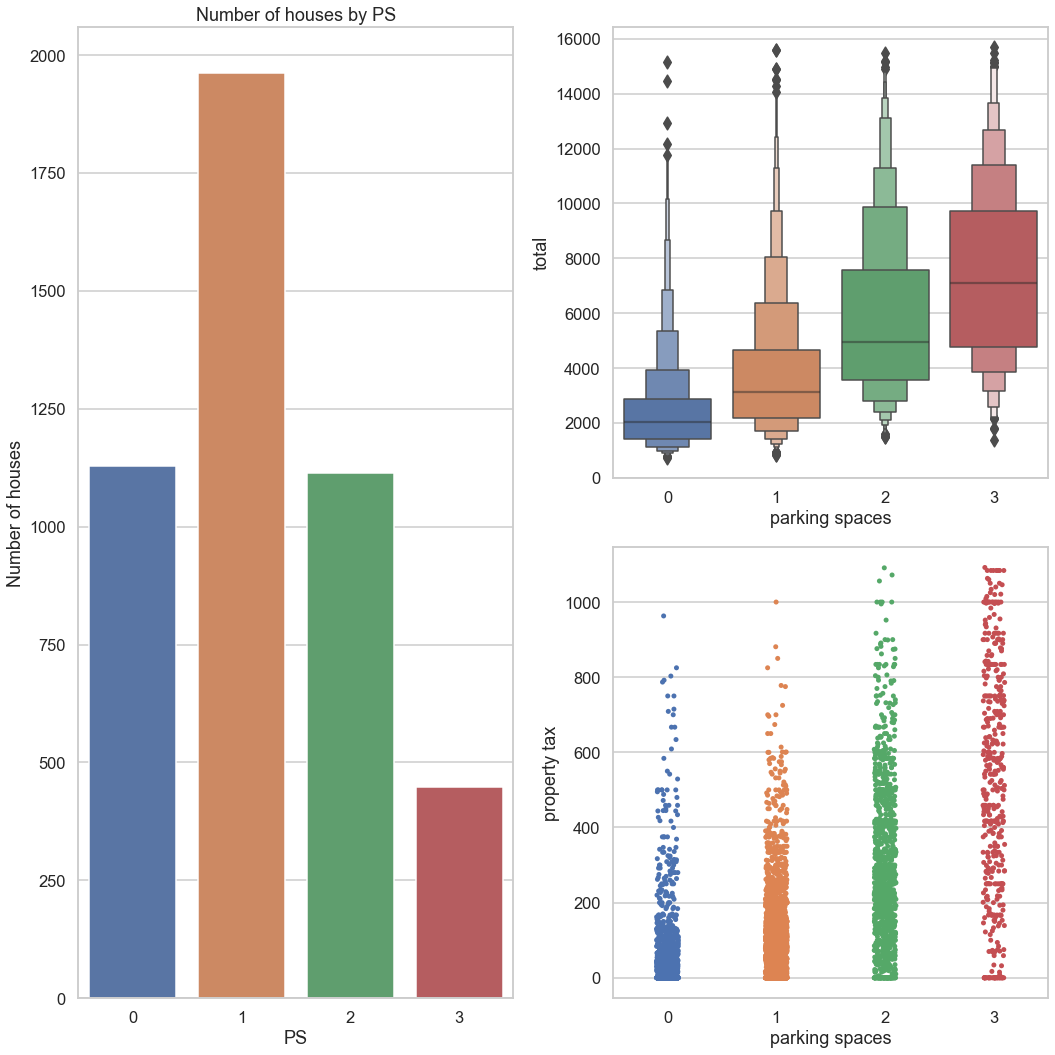

In [30]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig=plt.figure(figsize=(15,15))
axs=[]

axs.append(fig.add_subplot(1,2,1))
sns.countplot(x='parking spaces', data=houses)
plt.title('Number of houses by PS')
plt.ylabel('Number of houses')
plt.xlabel('PS');

axs.append(fig.add_subplot(2,2,2))
sns.boxenplot(x='parking spaces', y='total', data=houses)

axs.append(fig.add_subplot(2,2,4))
sns.stripplot(x='parking spaces', y='property tax', data=houses)



plt.tight_layout()

## Categorical & Numeric: Furniture 

In [31]:
houses.groupby('furniture')['total'].mean()

furniture
furnished        5575.114448
not furnished    3870.495322
Name: total, dtype: float64

In [32]:
houses.groupby('furniture')['total'].median()

furniture
furnished        4573.5
not furnished    2999.0
Name: total, dtype: float64

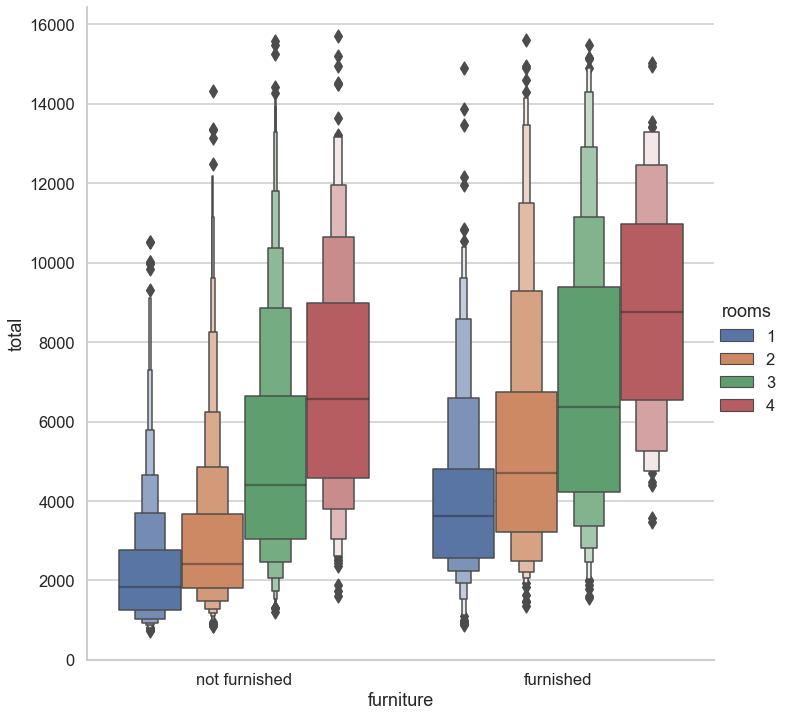

In [33]:
sns.catplot(x='furniture', y='total', kind='boxen', hue='rooms', data=houses, height=10)

## Animal

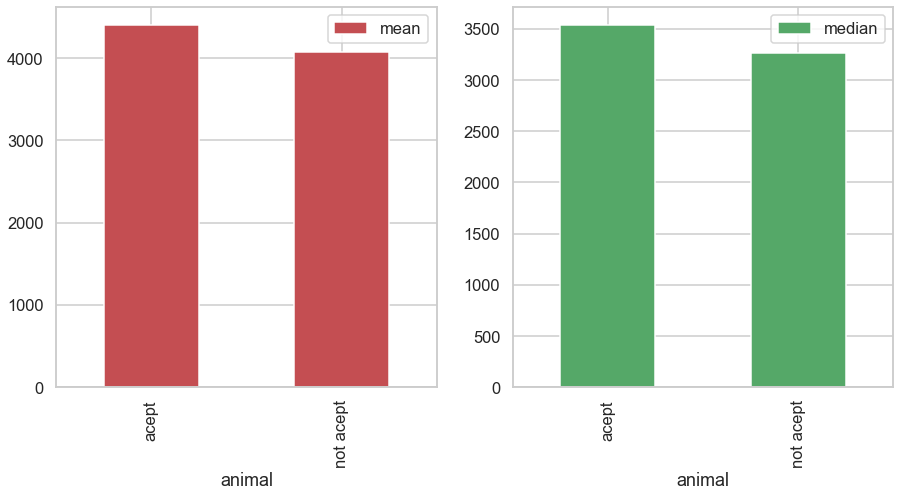

In [34]:
fig=plt.figure(figsize=(15,7))
axs=[]

axs.append(fig.add_subplot(1,2,1))
houses.groupby('animal')['total'].mean().plot.bar(label='mean', color='r')
plt.legend()

axs.append(fig.add_subplot(1,2,2))
houses.groupby('animal')['total'].median().plot.bar(label='median', color='g')
plt.legend()

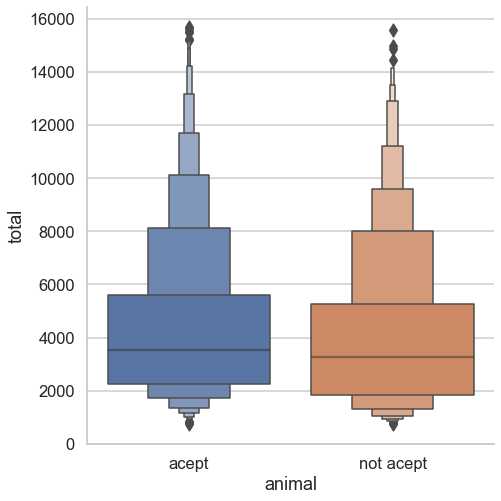

In [35]:
sns.catplot(x='animal', y='total', kind='boxen', data=houses, height=7)

# How to choose the flats?
I get ```area, rooms, total``` columns for main criterias

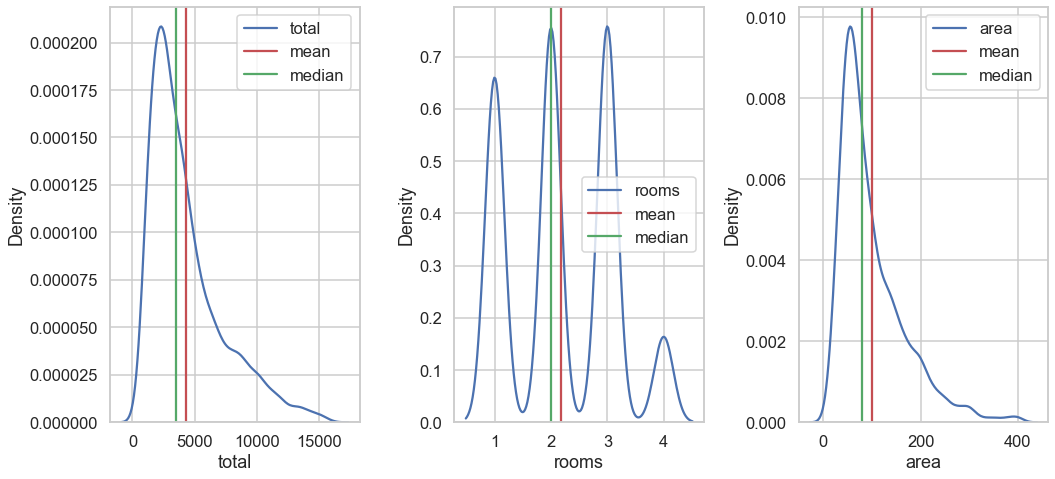

In [36]:
fig=plt.figure(figsize=(15,7))
axs=[]

axs.append(fig.add_subplot(1,3,1))
sns.kdeplot(houses.total, label='total')
plt.axvline(x=houses.total.mean(), color='r', label='mean')
plt.axvline(x=houses.total.median(), color='g', label='median')
plt.legend()

axs.append(fig.add_subplot(1,3,2))
sns.kdeplot(houses.rooms, label='rooms')
plt.axvline(x=houses.rooms.mean(), color='r', label='mean')
plt.axvline(x=houses.rooms.median(), color='g', label='median')
plt.legend()

axs.append(fig.add_subplot(1,3,3))
sns.kdeplot(houses.area, label='area')
plt.axvline(x=houses.area.mean(), color='r', label='mean')
plt.axvline(x=houses.area.median(), color='g', label='median')
plt.legend()
plt.tight_layout()

In [37]:
#They are not symmetric, that is why I will use median in the next times.

In [38]:
desc=houses.describe()

houses['Z-total']=houses.total.apply(lambda x: abs((x-desc['total']['50%'])/desc.total['std']))
houses['Z-area']=houses.area.apply(lambda x: abs((x-desc['area']['50%'])/desc.area['std']))

houses.head()

,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total,30 mkv,Z-total,Z-area
0,10,4,3,2,acept,not furnished,0,2670,21,41,2732,0-29.9,0.252423,1.027812
1,11,1,1,0,not acept,furnished,0,1181,0,15,1196,0-29.9,0.777081,1.012917
2,11,1,1,0,not acept,furnished,300,2100,42,27,2469,0-29.9,0.342257,1.012917
3,12,1,1,0,not acept,not furnished,0,1050,50,14,1114,0-29.9,0.805090,0.998021
4,13,1,1,0,acept,not furnished,0,2200,42,28,2270,0-29.9,0.410230,0.983125


In [39]:
res=houses[((houses['Z-area']<=0.5) & (houses['Z-total']<=0.5) & ((houses.rooms==2) | (houses.rooms==3)))]

In [40]:
res

,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total,30 mkv,Z-total,Z-area
870,47,2,1,1,acept,not furnished,597,1570,0,20,2187,30-59.9,0.438581,0.476667
873,47,2,2,2,acept,furnished,520,2611,24,34,3189,30-59.9,0.096324,0.476667
877,47,2,1,0,not acept,furnished,548,2200,0,16,2764,30-59.9,0.241493,0.476667
879,47,2,1,1,acept,furnished,500,1700,0,22,2222,30-59.9,0.426626,0.476667
898,47,2,1,1,acept,not furnished,500,1500,0,20,2020,30-59.9,0.495624,0.476667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,112,3,2,3,acept,not furnished,0,3300,32,50,3382,90-119.9,0.030400,0.491562
3197,112,3,2,0,not acept,not furnished,621,3110,95,40,3866,90-119.9,0.134922,0.491562
3198,112,3,2,3,acept,not furnished,1251,2500,332,32,4115,90-119.9,0.219974,0.491562
3199,112,3,2,1,acept,not furnished,810,3850,98,49,4807,90-119.9,0.456343,0.491562


In [41]:
res.describe()

,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total,Z-total,Z-area
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,76.780702,2.375439,1.712281,1.171930,680.934211,2334.438596,107.157018,29.375439,3152.237719,0.262120,0.219779
std,17.090504,0.484448,0.628297,0.690015,351.332542,690.611713,114.370771,10.428456,813.946981,0.142811,0.132508
min,47.000000,2.000000,1.000000,0.000000,0.000000,960.000000,0.000000,5.000000,2009.000000,0.000342,0.000000
25%,62.000000,2.000000,1.000000,1.000000,500.000000,1800.000000,9.000000,22.000000,2456.500000,0.144998,0.119167
50%,75.000000,2.000000,2.000000,1.000000,690.000000,2200.000000,84.000000,28.000000,3014.000000,0.261816,0.208542
75%,90.000000,3.000000,2.000000,2.000000,900.000000,2800.000000,159.000000,36.250000,3838.250000,0.391444,0.312812
max,112.000000,3.000000,4.000000,3.000000,2600.000000,4800.000000,1056.000000,73.000000,4931.000000,0.499381,0.491562


# Flats in res dataframe are statistically reasonable price

In this project I used some stat methods:

    1. IQR(for outliers)
    
    2. Normal Dist or Z-score(to choose stat normal flats)
    
    3. Mean, median, mode, count(for description columns)
